In [1]:
import pandas as pd
from io import StringIO
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
 5.0,6.0,,8.0
 10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [5]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [6]:
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [7]:
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [8]:
from sklearn.impute import SimpleImputer
import numpy as np
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr=imr.fit(df.values)
impute=imr.transform(df.values)
impute

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [9]:
from sklearn.impute import SimpleImputer
imr=SimpleImputer(missing_values=np.nan,strategy='mean')
imr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [10]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [11]:
import pandas as pd
df=pd.DataFrame([['green ','m',65,'class1'],
                  ['yellow','l',76,'class2'],
                  ['red','xl',98,'class3']])
df.columns=['color','size','lengh','class']
df

,color,size,lengh,class
0,green,m,65,class1
1,yellow,l,76,class2
2,red,xl,98,class3


In [12]:
mapping={'m':1,'l':2,'xl':3}
df['size']=df['size'].map(mapping)

In [13]:
df

,color,size,lengh,class
0,green,1,65,class1
1,yellow,2,76,class2
2,red,3,98,class3


In [14]:
vk={v:k for v,k in mapping.items()}

In [15]:
df['size'].map(vk)

0   NaN
1   NaN
2   NaN
Name: size, dtype: float64

In [16]:
class_map={label:inx for label,inx in enumerate(np.unique(df['class']))}

In [17]:
class_map

{0: 'class1', 1: 'class2', 2: 'class3'}

In [18]:
df['class']=df['class'].map(class_map)

In [19]:
df['class']

0    NaN
1    NaN
2    NaN
Name: class, dtype: object

In [20]:
import pandas as pd
df=pd.DataFrame([['green','l',43,'class 1']
               ,['red','xl',76,'class 2'],
               ['blue','xxl',87,'class 3']])
df.columns=['color','size','price','classs']
df

,color,size,price,classs
0,green,l,43,class 1
1,red,xl,76,class 2
2,blue,xxl,87,class 3


In [21]:
from sklearn.preprocessing import OneHotEncoder
X=df[['color','price','size']].values
color_hg=OneHotEncoder()
color_hg.fit_transform(X[:, 0].reshape(-1, 1)).toarray()

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [22]:
pd.get_dummies(df[['price','size','color']])

,price,size_l,size_xl,size_xxl,color_blue,color_green,color_red
0,43,1,0,0,0,1,0
1,76,0,1,0,0,0,1
2,87,0,0,1,1,0,0


In [23]:
pd.get_dummies(df[['price','size','color']],drop_first=True)

,price,size_xl,size_xxl,color_green,color_red
0,43,0,0,1,0
1,76,1,0,0,1
2,87,0,1,0,0


In [24]:
df = pd.DataFrame([['green', 'M', 10.1,'class2'],
['red', 'L', 13.5,'class1'],
['blue', 'XL', 15.3,'class2']])
df.columns = ['color', 'size', 'price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [25]:
df['X>M']=df['size'].apply(lambda x:1 if x in {'L','XL'} else 0)

In [26]:
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

In [27]:
del df['size']

In [28]:
df

,color,price,classlabel,X>M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


In [29]:
df = pd.read_csv(
 'https://archive.ics.uci.edu/ml/'
 'machine-learning-databases/wine/wine.data',
 header=None
)

In [30]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/''ml/machine-learning-databases/''wine/wine.data', header=None)

In [31]:
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids',
'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [32]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [33]:
from sklearn.model_selection import train_test_split
x,y=df.iloc[:,1:].values,df.iloc[:,0].values

In [34]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3,random_state=0,stratify=y)

In [35]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [36]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('standardized:', (ex - ex.mean()) / ex.std())

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [37]:
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))


normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [38]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr')

LogisticRegression(multi_class='ovr', penalty='l1', solver='liblinear')

In [40]:
lr = LogisticRegression(penalty='l1',C=1.0,solver='liblinear',multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 1.0


In [41]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 1.0


In [42]:
lr.intercept_

array([-1.26352628, -1.21576224, -2.37027813])

In [43]:
lr.coef_

array([[ 1.24573992,  0.18060008,  0.74495016, -1.16249267,  0.        ,
         0.        ,  1.16529063,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55207297,  2.50977978],
       [-1.53733528, -0.38723577, -0.99538873,  0.36512504, -0.0596177 ,
         0.        ,  0.6682251 ,  0.        ,  0.        , -1.93460848,
         1.23311276,  0.        , -2.23100163],
       [ 0.13575252,  0.16843472,  0.35714001,  0.        ,  0.        ,
         0.        , -2.43795405,  0.        ,  0.        ,  1.56364874,
        -0.81872403, -0.49239682,  0.        ]])

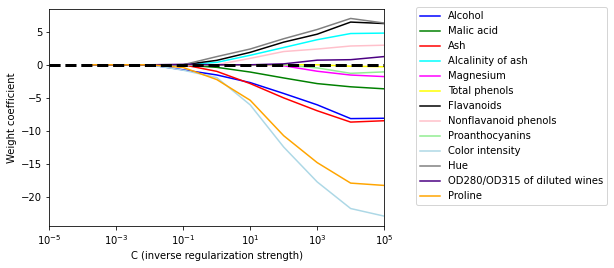

In [44]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black','pink', 'lightgreen', 'lightblue','gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c,solver='liblinear',multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],label=df_wine.columns[column + 1],color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()

# Sequential feature selection algorithms

In [45]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

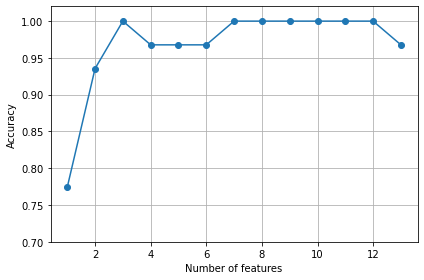

In [46]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

In [47]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [48]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [49]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


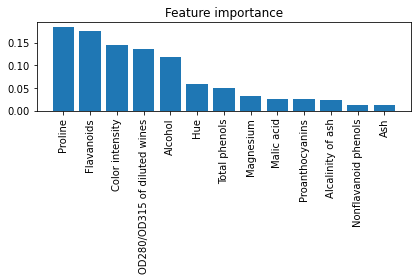

In [50]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)
plt.show()

In [51]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 5


In [52]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
